# Homework #2: Multiple Regressions and Assumptions of Regression
## Background
The US Department of Agriculture (USDA) publishes county-level datasets on poverty, population, unemployment, income and Education (https://www.ers.usda.gov/data-products/county-level-data-sets/). Imagine you're working for the USDA as a Data Scientist and you've been tasked with putting together an analysis of the influence of education, in rural vs urban communities, on household income and unemployment.

The USDA defines the rural vs urban on a continuum from 1 to 9 with 1 referring to the largest counties (for reference, Cache Valley was listed as a 3 in 2013). The full scale is shown below:

1. Metro - Counties in metro areas of 1 million population or more                                               
2. Metro - Counties in metro areas of 250,000 to 1 million population                                                   
3. Metro - Counties in metro areas of fewer than 250,000 population                                                     
4. Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                                             
5. Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                                         
6. Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                                             
7. Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                                         
8. Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area                           
9. Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area

**Relevant Datasets**
In the `education_unemployment` folder:
* `education.csv`
* `unemployment.csv`

## Task 1
Merge these two datasets on the FIPS code for each county.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import numpy as np
import seaborn as sns
# from sklearn.datasets import load_diabetes
from math import sqrt

In [2]:
education_df = pd.read_csv('education.csv')
unemployment_df = pd.read_csv('unemployment.csv')
unemployment_df.rename(columns={'FIPS_Code': 'FIPS Code'}, inplace=True)
df = pd.merge(education_df, unemployment_df, on='FIPS Code', how='outer')

## Task 2
Using this merged dataset, fit a model that predicts household income given the different variables of percent of the county reaching the different education levels. I'll leave it up to you how you decide to include the rural vs urban in your model (e.g. as a continuous variable, as a categorical variable, as a binary variable, by subsetting).

Tip: Does it make sense to include every education level in the model from a mathematical perspective?

In [3]:
df = df.dropna(subset=['Median_Household_Income_2019'])
df['Median_Household_Income_2019'] = df['Median_Household_Income_2019'].str.replace(',', '').astype(int)

In [4]:
columns_to_keep = [
    'City/Suburb/Town/Rural',  # City/Suburb/Town/Rural column
    'Median_Household_Income_2019',  # Median household income column
    # Education columns from 2015-19
    'Percent of adults with less than a high school diploma, 2015-19',
    'Percent of adults with a high school diploma only, 2015-19',
    "Percent of adults completing some college or associate's degree, 2015-19",
    "Percent of adults with a bachelor's degree or higher, 2015-19"
]

df = df[columns_to_keep].copy()

In [5]:
df.dropna(inplace=True)

In [6]:
new_column_names = {
    'City/Suburb/Town/Rural': 'Location',
    'Median_Household_Income_2019': 'HHI',
    'Percent of adults with less than a high school diploma, 2015-19': 'Less_HS',
    'Percent of adults with a high school diploma only, 2015-19': 'HS_Only',
    "Percent of adults completing some college or associate's degree, 2015-19": 'Some_College',
    "Percent of adults with a bachelor's degree or higher, 2015-19": 'Bachelors'
}
df.rename(columns=new_column_names, inplace=True)

In [7]:
df['Location'] = df['Location'].replace({'City': 'Urban', 'Suburb': 'Urban', 'Town': 'Rural'})

In [8]:
results = smf.ols('HHI ~ Location + Less_HS + HS_Only + Some_College + Bachelors', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HHI   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     748.1
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        21:22:55   Log-Likelihood:                -33318.
No. Observations:                3141   AIC:                         6.665e+04
Df Residuals:                    3135   BIC:                         6.668e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.044e+05   3.03e+05     -1.664      0.096    -1.1e+06    8.98e+04
Location[T.Urban]  4522.5105    374.147     12.088      0.000    3788.912    5256.109
Less_HS            5100.8785   3030.604      1.683      0.092    -841.290     1.1e+04
HS_Only            5383.3071   3030.637      1.776      0.076    -558.927    1.13e+04
Some_College       5506.7042   3031.356      1.817      0.069    -436.939    1.15e+04
Bachelors          6269.5157   3029.473      2.070      0.039     329.564    1.22e+04
==============================================================================
Omnibus:                      347.059   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              888.665
Skew:                           0.626   Prob(JB):                    1.07e-193
Kurtosis:                       5.285   Cond. No.                     9.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='RdBu')

,HHI,Less_HS,HS_Only,Some_College,Bachelors
HHI,1.000000,-0.518225,-0.543175,0.068010,0.712559
Less_HS,-0.518225,1.000000,0.255558,-0.462653,-0.595515
HS_Only,-0.543175,0.255558,1.000000,-0.265496,-0.778220
Some_College,0.068010,-0.462653,-0.265496,1.000000,-0.041063
Bachelors,0.712559,-0.595515,-0.778220,-0.041063,1.000000


In [10]:
df.head()

,Location,HHI,Less_HS,HS_Only,Some_College,Bachelors
0,Urban,47918,20.9,44.9,23.8,10.4
1,Urban,52902,19.5,33.4,34.0,13.1
2,Urban,49692,18.2,44.4,24.6,12.7
3,Urban,54127,9.9,26.4,30.3,33.4
4,Urban,65403,15.4,35.6,32.9,16.1


eval_env: 1


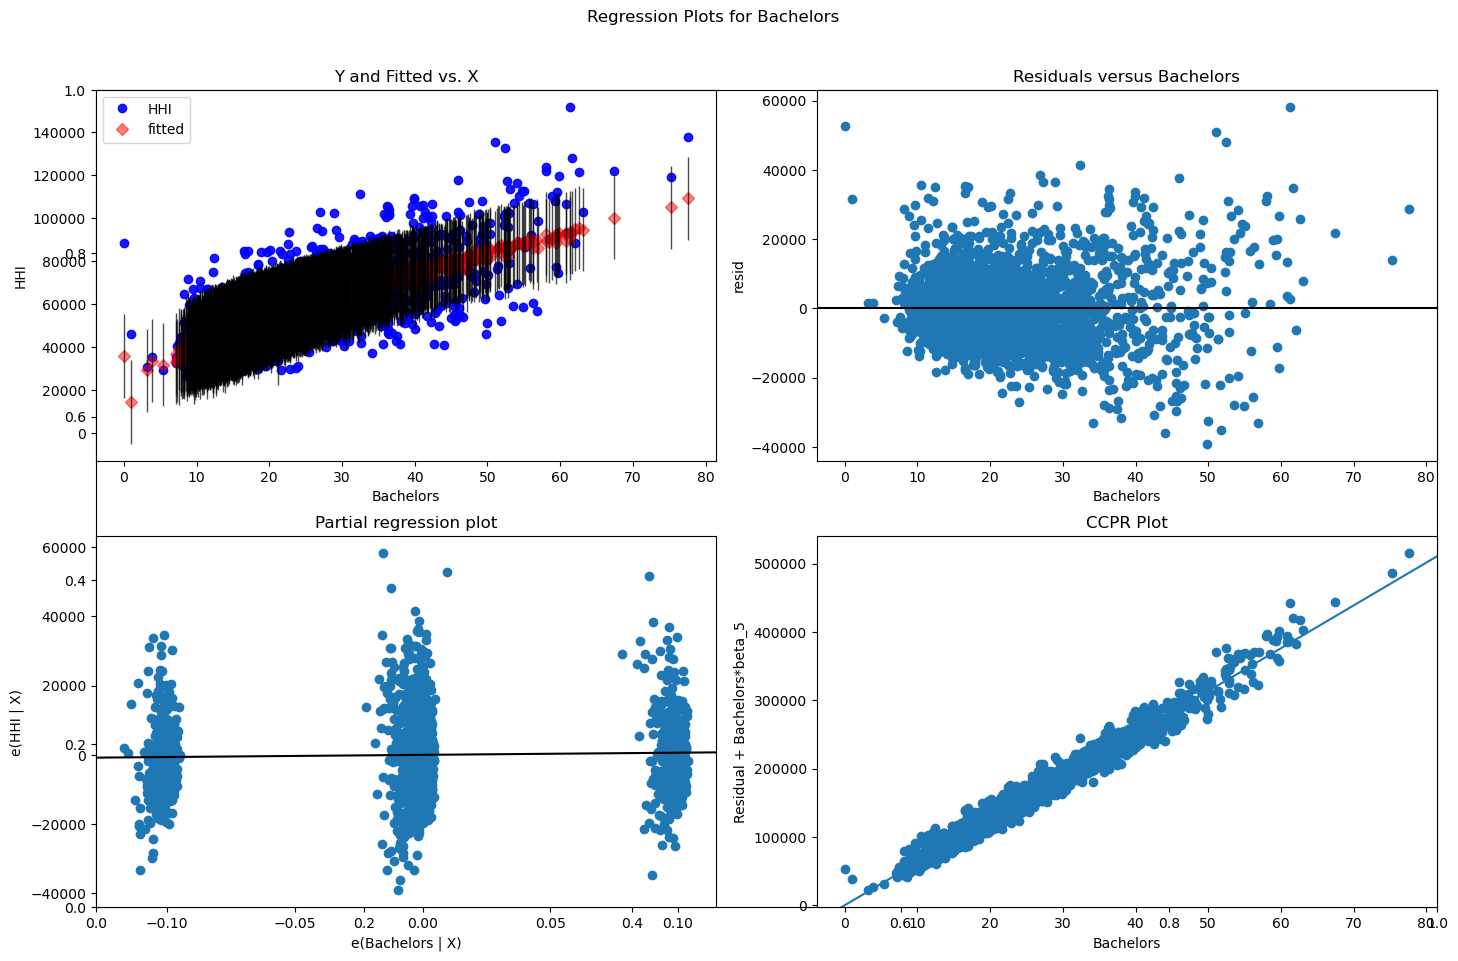

In [11]:
# Check Linearity
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'Bachelors', fig=fig)
plt.show()

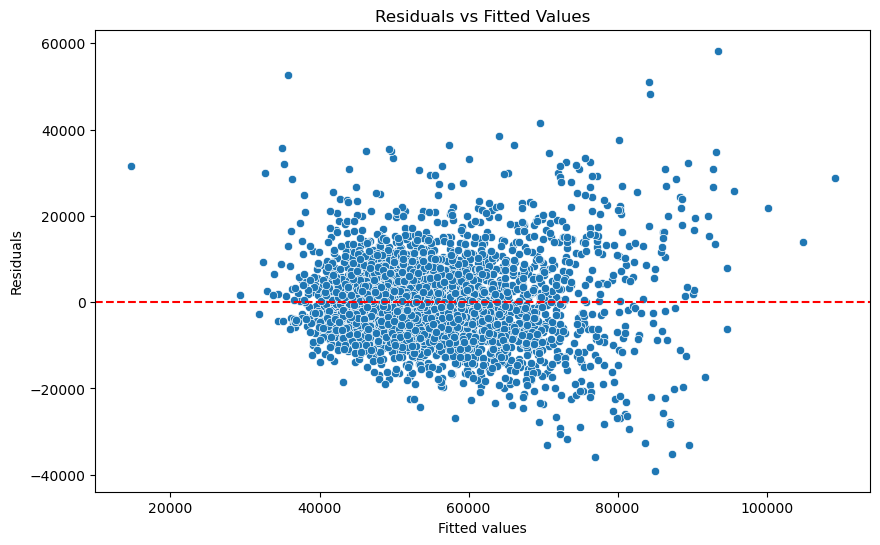

In [12]:
fitted_vals = results.fittedvalues

# Residuals
residuals = results.resid

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [13]:
# Independence
sm.stats.durbin_watson(results.resid)

1.3583899793391478

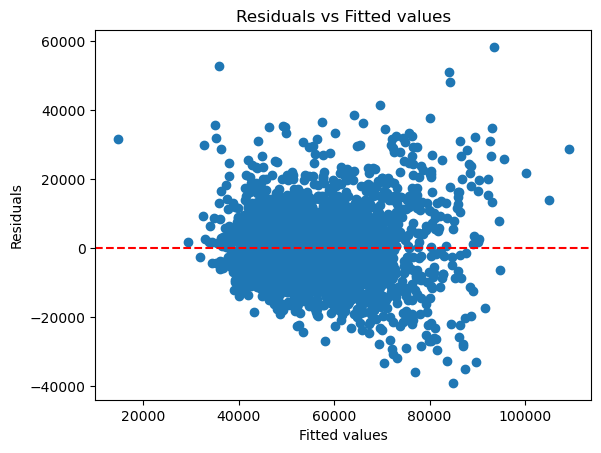

In [14]:
# Homoscedasticity
fitted_values = results.fittedvalues
residuals = results.resid

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

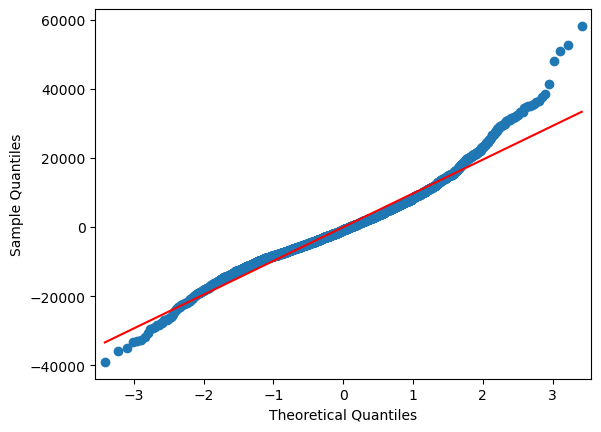

In [15]:
# Normality
# Q-Q plot to check for normality of residuals
fig = sm.qqplot(results.resid, line = "s")

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
X = df[['Less_HS', 'HS_Only', 'Some_College', 'Bachelors']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,Less_HS,5.612789
1,HS_Only,17.359032
2,Some_College,19.753005
3,Bachelors,5.665664


## Task 3

Consider all of the regression assumptions that must be met, do any transformations you deem necessary, and then refit the model. Interpret the regression results (explain assumptions that are broken) and provide an answer to the question of "how does education level attained influence household income in rural vs urban communities".

Also, provide an answer in layman's terms that you could report to stakeholders that may or may not be familiar with regression.

In [17]:
df_dummies = pd.get_dummies(df, columns=['Location'], drop_first=False)

In [18]:
corr_dummies = df_dummies.corr()
corr_dummies.style.background_gradient(cmap='RdBu')

,HHI,Less_HS,HS_Only,Some_College,Bachelors,Location_Rural,Location_Urban
HHI,1.000000,-0.518225,-0.543175,0.068010,0.712559,-0.380333,0.380333
Less_HS,-0.518225,1.000000,0.255558,-0.462653,-0.595515,0.169648,-0.169648
HS_Only,-0.543175,0.255558,1.000000,-0.265496,-0.778220,0.280530,-0.280530
Some_College,0.068010,-0.462653,-0.265496,1.000000,-0.041063,0.053657,-0.053657
Bachelors,0.712559,-0.595515,-0.778220,-0.041063,1.000000,-0.352004,0.352004
Location_Rural,-0.380333,0.169648,0.280530,0.053657,-0.352004,1.000000,-1.000000
Location_Urban,0.380333,-0.169648,-0.280530,-0.053657,0.352004,-1.000000,1.000000


In [19]:
results_dummy = smf.ols('HHI ~ Less_HS + HS_Only + Bachelors + Location_Rural + Location_Urban', data=df_dummies).fit()
results = results_dummy
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HHI   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     933.7
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        21:22:56   Log-Likelihood:                -33319.
No. Observations:                3141   AIC:                         6.665e+04
Df Residuals:                    3136   BIC:                         6.668e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.223e+04   1663.236     19.376      0.000     2.9e+04    3.55e+04
Less_HS         -404.0229     38.184    -10.581      0.000    -478.891    -329.155
HS_Only         -121.5569     42.243     -2.878      0.004    -204.384     -38.730
Bachelors        766.6924     39.213     19.552      0.000     689.807     843.578
Location_Rural  1.386e+04    835.969     16.582      0.000    1.22e+04    1.55e+04
Location_Urban  1.836e+04    868.513     21.144      0.000    1.67e+04    2.01e+04
==============================================================================
Omnibus:                      346.513   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              891.952
Skew:                           0.624   Prob(JB):                    2.07e-194
Kurtosis:                       5.293   Cond. No.                     6.88e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

          feature           VIF
0         Less_HS  1.179956e+04
1         HS_Only  1.573420e+04
2    Some_College  8.168635e+03
3       Bachelors  2.755747e+04
4  Location_Rural  1.536396e+06
5  Location_Urban  1.472114e+06


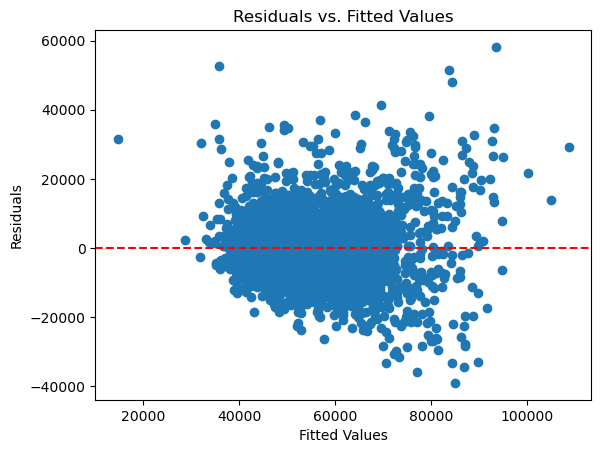

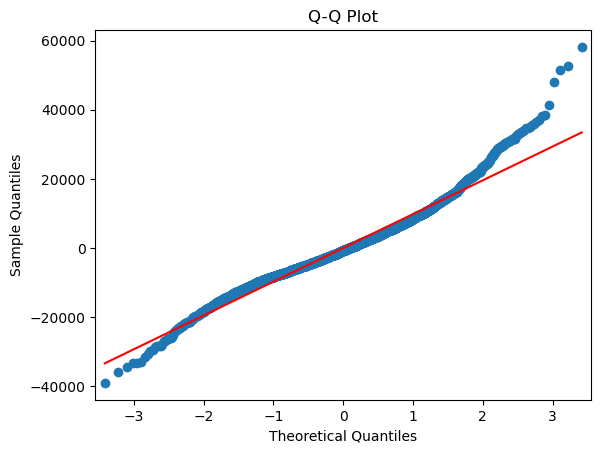

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare the predictors for VIF calculation
X_dummies = df_dummies[['Less_HS', 'HS_Only', 'Some_College', 'Bachelors', 'Location_Rural', 'Location_Urban']]
vif_data_dummies = pd.DataFrame()
vif_data_dummies["feature"] = X_dummies.columns
vif_data_dummies["VIF"] = [variance_inflation_factor(X_dummies.values, i) for i in range(X_dummies.shape[1])]

print(vif_data_dummies)


# Residual plots
residuals = results_dummy.resid
fitted = results_dummy.fittedvalues

# Plot residuals vs. fitted values
plt.scatter(fitted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Q-Q plot for normality
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

In [21]:
# In all, a college education has a positive relation to higher income. A Bachelor's degree will help those in urban communitites, but those in rural communities benefit better from less to no college.

# Note, in this model, the data is close, but not quite normally distributed. Some variables such as "Some College" are nonlinear and may be multicollinear. 
# It is also almost homsocedastic, but there tend to be greater residual outliers as fitted values increase

## Task 4
Repeat the above analysis but with unemployment rate as the response variable. Answer the same questions you did in Task 3.

In [22]:
df2 = pd.merge(education_df, unemployment_df, on='FIPS Code', how='outer')  

In [23]:
df2 = df2.dropna(subset=['Unemployment_rate_2019'])

In [24]:
columns_to_keep = [
    'City/Suburb/Town/Rural',  # City/Suburb/Town/Rural column
    'Unemployment_rate_2019',  # Unemployment Rate
    # Education columns from 2015-19
    'Percent of adults with less than a high school diploma, 2015-19',
    'Percent of adults with a high school diploma only, 2015-19',
    "Percent of adults completing some college or associate's degree, 2015-19",
    "Percent of adults with a bachelor's degree or higher, 2015-19"
]

df2 = df2[columns_to_keep].copy()

In [25]:
df2.dropna(inplace=True)

In [26]:
new_column_names = {
    'City/Suburb/Town/Rural': 'Location',
    'Unemployment_rate_2019': 'UR',
    'Percent of adults with less than a high school diploma, 2015-19': 'Less_HS',
    'Percent of adults with a high school diploma only, 2015-19': 'HS_Only',
    "Percent of adults completing some college or associate's degree, 2015-19": 'Some_College',
    "Percent of adults with a bachelor's degree or higher, 2015-19": 'Bachelors'
}
df2.rename(columns=new_column_names, inplace=True)

In [27]:
df2['Location'] = df2['Location'].replace({'City': 'Urban', 'Suburb': 'Urban', 'Town': 'Rural'})

In [28]:
results = smf.ols('UR ~ Location + Less_HS + HS_Only + Some_College + Bachelors', data=df2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     UR   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     165.7
Date:                Thu, 30 May 2024   Prob (F-statistic):          3.88e-157
Time:                        21:22:56   Log-Likelihood:                -6067.9
No. Observations:                3219   AIC:                         1.215e+04
Df Residuals:                    3213   BIC:                         1.218e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.7398     48.950     -0.056      0.955     -98.716      93.236
Location[T.Urban]     0.2859      0.060      4.740      0.000       0.168       0.404
Less_HS               0.1584      0.490      0.324      0.746      -0.801       1.118
HS_Only               0.0694      0.489      0.142      0.887      -0.890       1.029
Some_College          0.0407      0.490      0.083      0.934      -0.919       1.001
Bachelors             0.0439      0.489      0.090      0.929      -0.916       1.003
==============================================================================
Omnibus:                     1621.588   Durbin-Watson:                   0.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16940.153
Skew:                           2.154   Prob(JB):                         0.00
Kurtosis:                      13.380   Cond. No.                     9.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
corr = df2.corr()
corr.style.background_gradient(cmap='RdBu')

,UR,Less_HS,HS_Only,Some_College,Bachelors
UR,1.000000,0.438572,0.170551,-0.252464,-0.290838
Less_HS,0.438572,1.000000,0.209364,-0.502723,-0.567992
HS_Only,0.170551,0.209364,1.000000,-0.235381,-0.771401
Some_College,-0.252464,-0.502723,-0.235381,1.000000,-0.037154
Bachelors,-0.290838,-0.567992,-0.771401,-0.037154,1.000000


0.9771837141400946

eval_env: 1


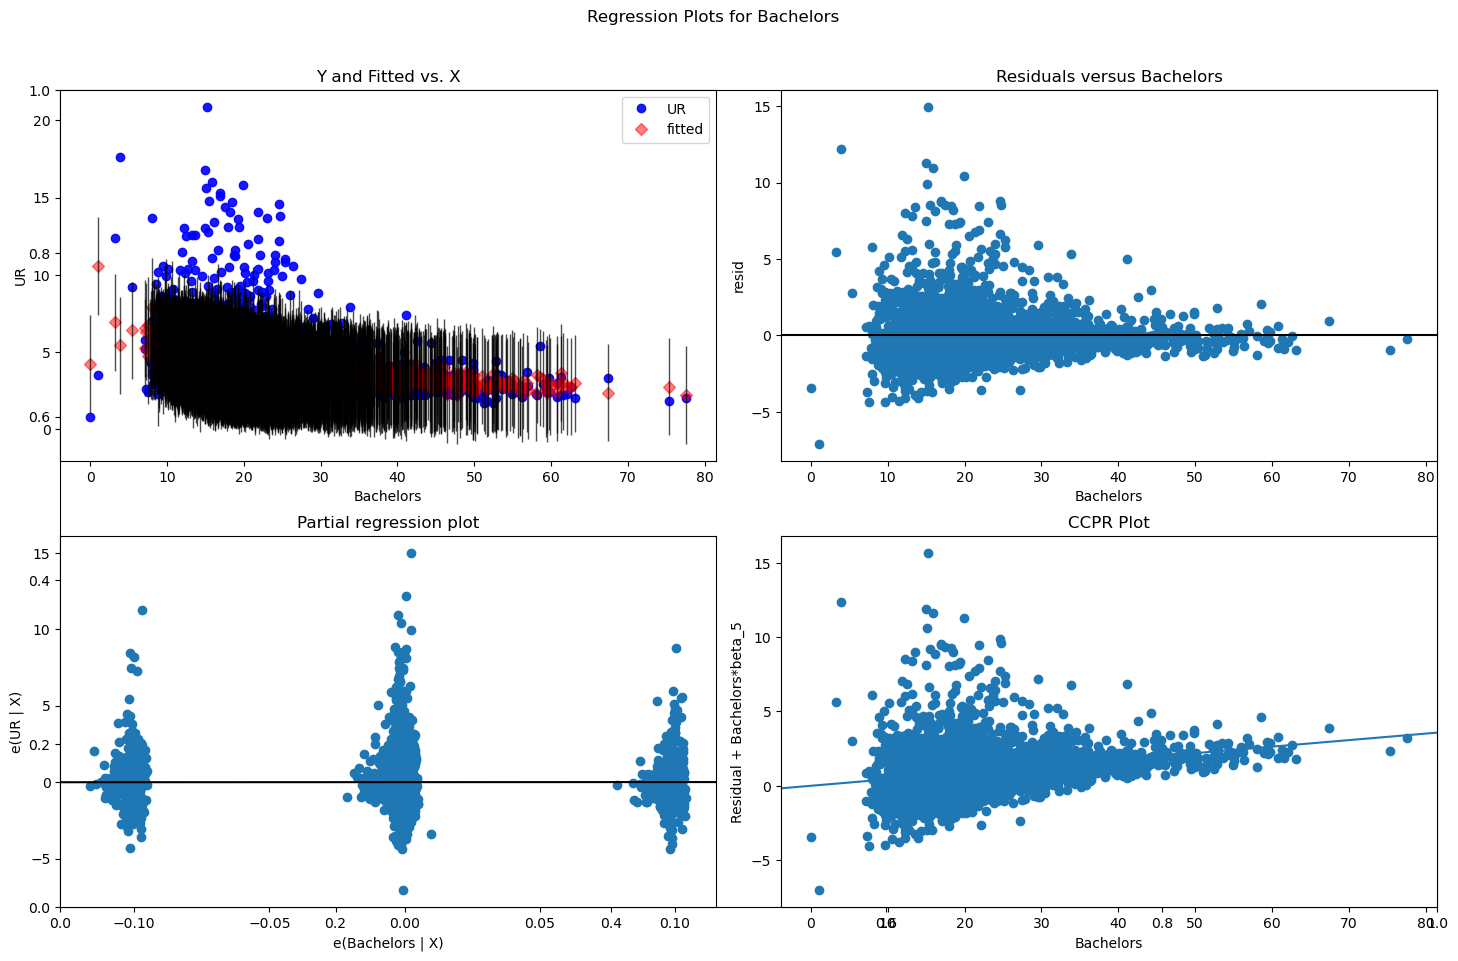

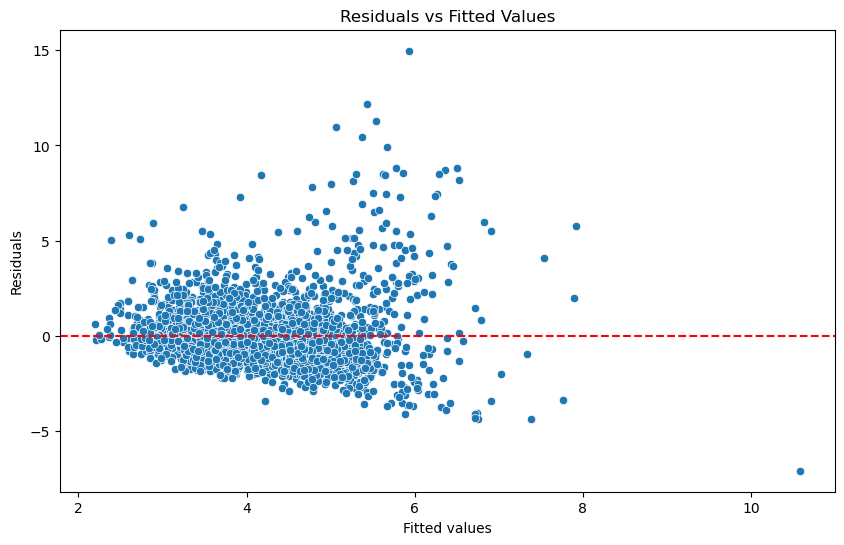

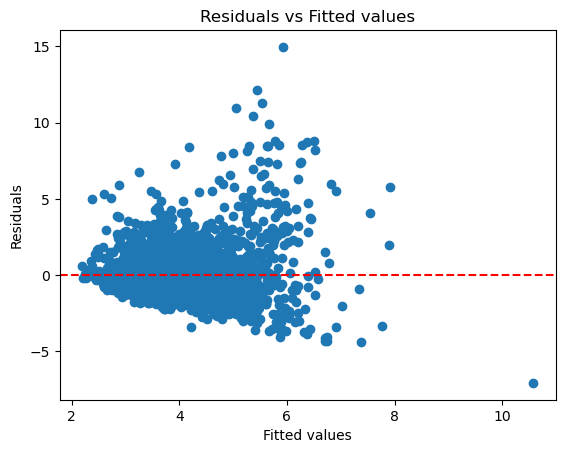

,feature,VIF
0,Less_HS,5.612789
1,HS_Only,17.359032
2,Some_College,19.753005
3,Bachelors,5.665664


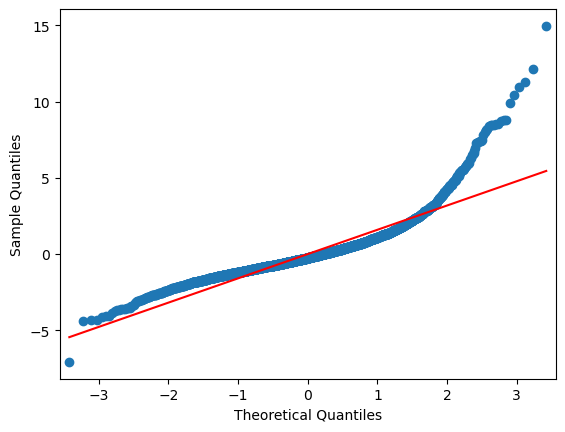

In [30]:
# Independence
print(sm.stats.durbin_watson(results.resid))
print()

# Check Linearity
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'Bachelors', fig=fig)
plt.show()

fitted_vals = results.fittedvalues

# Residuals
residuals = results.resid

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


# Homoscedasticity
fitted_values = results.fittedvalues
residuals = results.resid

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# Normality
# Q-Q plot to check for normality of residuals
fig = sm.qqplot(results.resid, line = "s")

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
X = df[['Less_HS', 'HS_Only', 'Some_College', 'Bachelors']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

In [31]:
df2_dummies = pd.get_dummies(df2, columns=['Location'], drop_first=False)

In [32]:
corr_dummies = df2_dummies.corr()
corr_dummies.style.background_gradient(cmap='RdBu')

,UR,Less_HS,HS_Only,Some_College,Bachelors,Location_Rural,Location_Urban
UR,1.000000,0.438572,0.170551,-0.252464,-0.290838,-0.001202,0.001202
Less_HS,0.438572,1.000000,0.209364,-0.502723,-0.567992,0.118174,-0.118174
HS_Only,0.170551,0.209364,1.000000,-0.235381,-0.771401,0.288204,-0.288204
Some_College,-0.252464,-0.502723,-0.235381,1.000000,-0.037154,0.083058,-0.083058
Bachelors,-0.290838,-0.567992,-0.771401,-0.037154,1.000000,-0.347330,0.347330
Location_Rural,-0.001202,0.118174,0.288204,0.083058,-0.347330,1.000000,-1.000000
Location_Urban,0.001202,-0.118174,-0.288204,-0.083058,0.347330,-1.000000,1.000000


In [33]:
results_dummy = smf.ols('UR ~ Less_HS + HS_Only + Bachelors + Location_Rural + Location_Urban', data=df2_dummies).fit()
results = results_dummy
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     UR   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     207.2
Date:                Thu, 30 May 2024   Prob (F-statistic):          2.54e-158
Time:                        21:22:58   Log-Likelihood:                -6067.9
No. Observations:                3219   AIC:                         1.215e+04
Df Residuals:                    3214   BIC:                         1.218e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9799      0.267      3.670      0.000       0.456       1.503
Less_HS            0.1178      0.006     20.306      0.000       0.106       0.129
HS_Only            0.0288      0.007      4.222      0.000       0.015       0.042
Bachelors          0.0032      0.006      0.511      0.610      -0.009       0.016
Location_Rural     0.3471      0.134      2.593      0.010       0.085       0.610
Location_Urban     0.6328      0.140      4.527      0.000       0.359       0.907
==============================================================================
Omnibus:                     1621.463   Durbin-Watson:                   0.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16935.492
Skew:                           2.154   Prob(JB):                         0.00
Kurtosis:                      13.378   Cond. No.                     2.66e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

0.9770831477845395

eval_env: 1


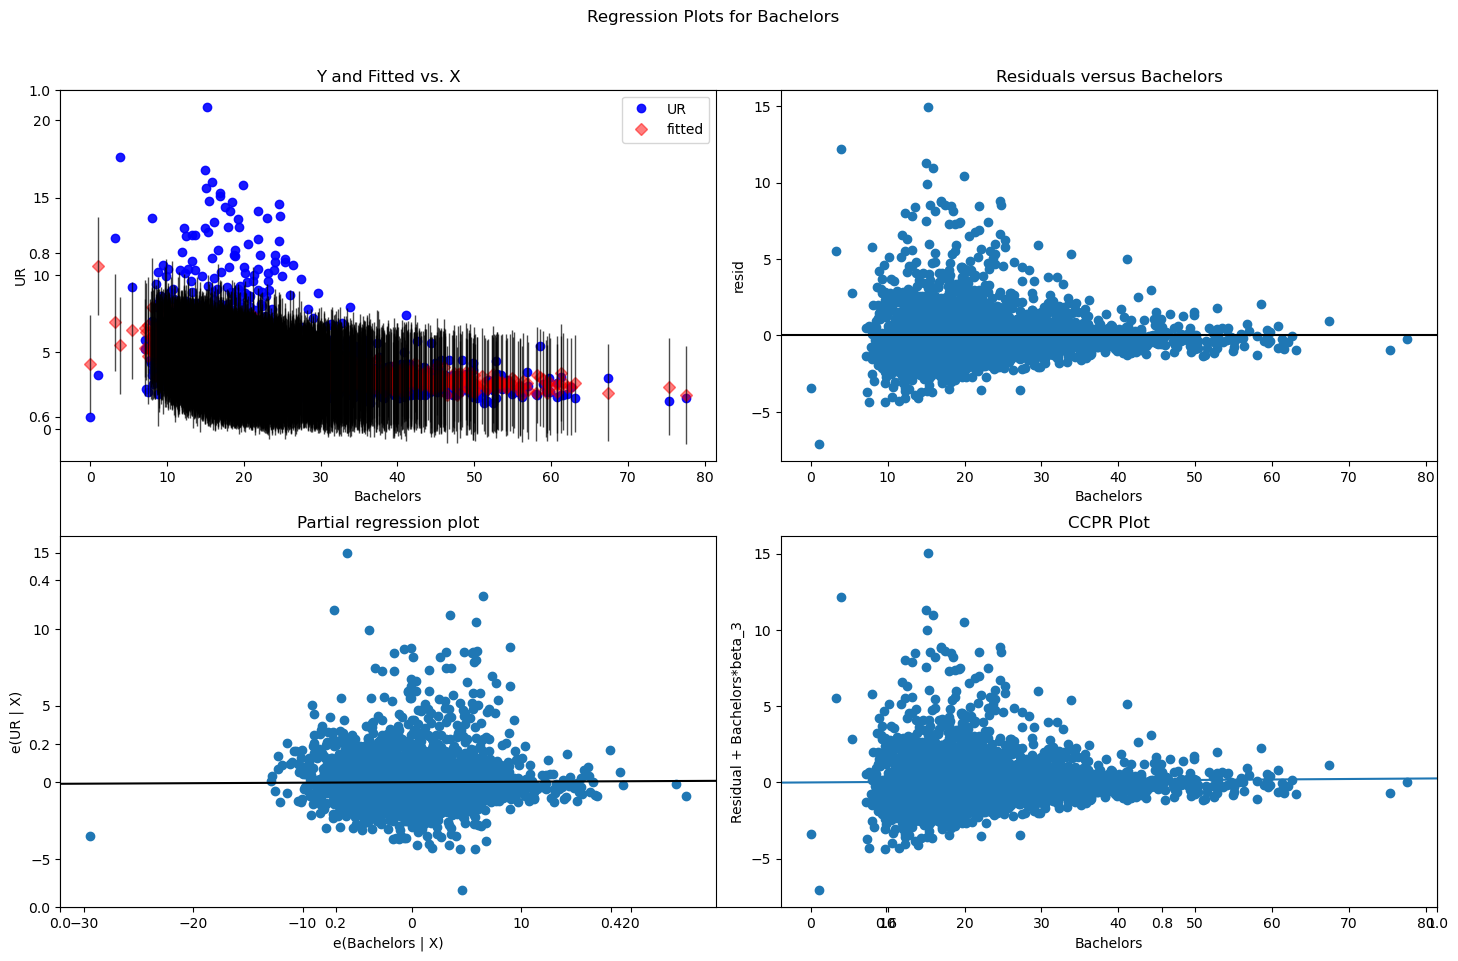

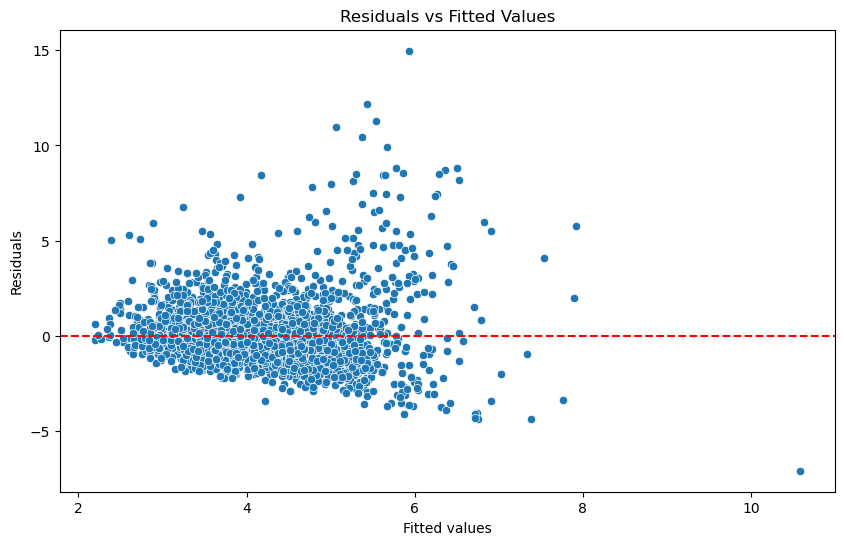

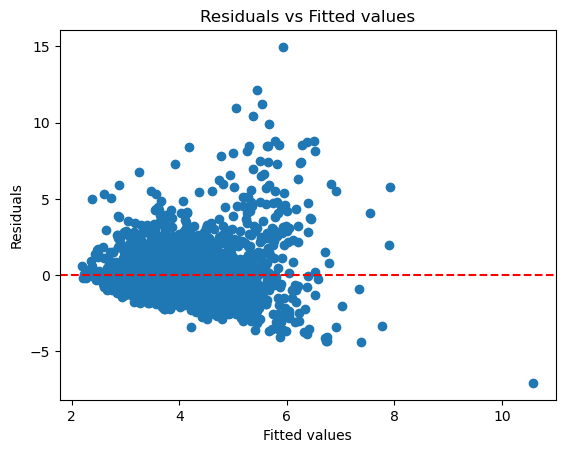

,feature,VIF
0,Less_HS,5.612789
1,HS_Only,17.359032
2,Some_College,19.753005
3,Bachelors,5.665664


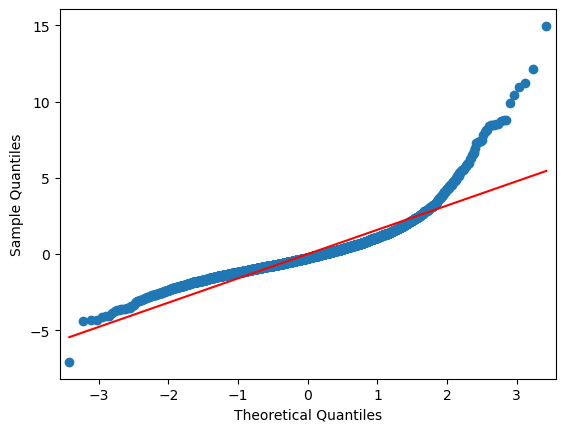

In [34]:
# Independence
print(sm.stats.durbin_watson(results.resid))
print()

# Check Linearity
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'Bachelors', fig=fig)
plt.show()

fitted_vals = results.fittedvalues

# Residuals
residuals = results.resid

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


# Homoscedasticity
fitted_values = results.fittedvalues
residuals = results.resid

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# Normality
# Q-Q plot to check for normality of residuals
fig = sm.qqplot(results.resid, line = "s")

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
X = df[['Less_HS', 'HS_Only', 'Some_College', 'Bachelors']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

In [35]:
# In all, a college education has a negative relation to unemployment rate. The more educated an area is, the lower the unemployment rate. Bachelors degrees have a greater affect on urban areas. 

# Note, this model is not normally distributed and has some issues there. Some variables such as "Some College" are nonlinear.
# It is also almost homoscedastic, but there tend to be greater residual outliers as fitted values increase. It is also not independent. 